In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [20]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [28]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)


array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7], dtype=uint8)

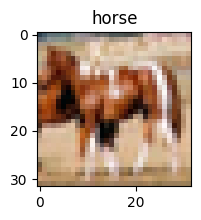

In [22]:
def show(x,y,index):
  categories=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck',]
  plt.figure(figsize=(10,2))
  plt.imshow(x[index])
  plt.title(categories[y[index]])
show(X_train,y_train,114)

In [23]:
#  "feature scaling"
X_train=X_train/255
X_test=X_test/255

In [29]:
ann=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(3000,activation='relu'),
    tf.keras.layers.Dense(1500,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')
]   )
ann.compile(optimizer='SGD',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)

In [30]:
ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 5ms/step - loss: 1.8103 - accuracy: 0.3528
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6212 - accuracy: 0.4296
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5377 - accuracy: 0.4556
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4777 - accuracy: 0.4794
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4281 - accuracy: 0.4974
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3859 - accuracy: 0.5131
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3451 - accuracy: 0.5282
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3128 - accuracy: 0.5402
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2785 - accuracy: 0.5527
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.24

In [31]:
y_pred=ann.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [32]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4106 - accuracy: 0.4873


[1.4106166362762451, 0.48730000853538513]

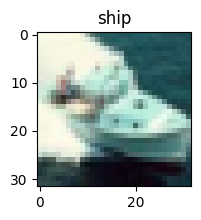

In [36]:
show (X_test,y_test,144)

In [37]:
np.argmax(y_pred[144])

8

In [39]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.46      0.55      1000
           1       0.76      0.44      0.56      1000
           2       0.44      0.30      0.35      1000
           3       0.37      0.31      0.34      1000
           4       0.51      0.30      0.38      1000
           5       0.59      0.21      0.31      1000
           6       0.32      0.88      0.47      1000
           7       0.65      0.53      0.58      1000
           8       0.54      0.75      0.63      1000
           9       0.51      0.69      0.59      1000

    accuracy                           0.49     10000
   macro avg       0.54      0.49      0.48     10000
weighted avg       0.54      0.49      0.48     10000



In [40]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [41]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 5ms/step - loss: 1.4351 - accuracy: 0.4863
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0801 - accuracy: 0.6223
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9486 - accuracy: 0.6686
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8630 - accuracy: 0.6985
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7960 - accuracy: 0.7223
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7312 - accuracy: 0.7468
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6795 - accuracy: 0.7615
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6291 - accuracy: 0.7798
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5840 - accuracy: 0.7937
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.54

In [44]:
y_pred=cnn.predict(X_test)
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9352 - accuracy: 0.6994


[0.9352317452430725, 0.699400007724762]

In [46]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.82      0.81      0.81      1000
           2       0.59      0.57      0.58      1000
           3       0.56      0.48      0.52      1000
           4       0.68      0.60      0.64      1000
           5       0.58      0.60      0.59      1000
           6       0.76      0.78      0.77      1000
           7       0.67      0.78      0.72      1000
           8       0.81      0.82      0.82      1000
           9       0.75      0.80      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

